# Predicting Heart Disease by usung Logistic Regression

#### Created by: Polin Tsenova 

Heart disease is the major cause of mortality globally. It accounts for more deaths annually than any other cause. In 2016 it is estimated that around 31% of all deaths are due to cardiovascular diseases. The early diagnosis is an important factor for reducing the risks and ground for changing people lifestyle so they have chance to live longer. This notebook research the most common risk factors of heart disease and predicts the overall risk of heart problems using the machine learning technique logistic regression.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

### Read Data

In [2]:
heart = pd.read_csv('heart_disease.csv')

In [3]:
heart.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Initial Data Exploration

Source:

The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts.It includes over 4 200 records and 16 attributes.

In [4]:
heart.shape

(4240, 16)

In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
gender             4240 non-null int64
age                4240 non-null int64
education          4135 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [6]:
# Check for missing values
heart.isnull().sum()

gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [7]:
heart.describe()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


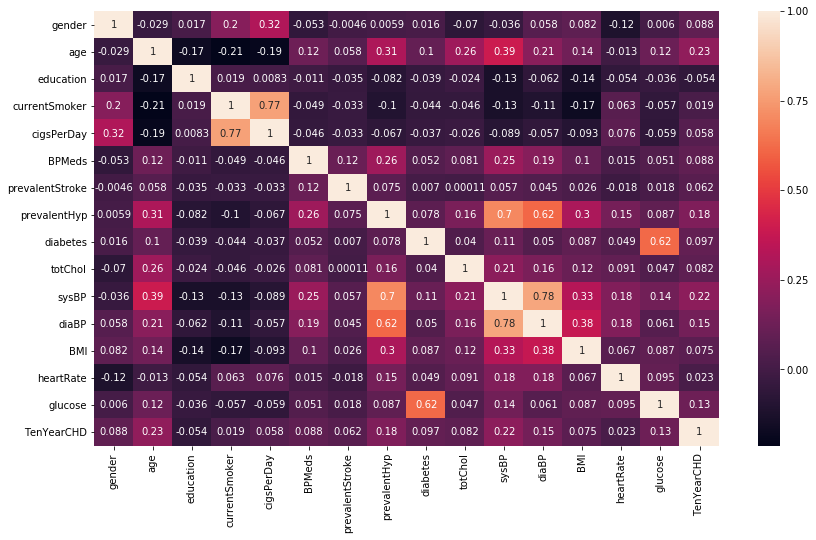

In [8]:
plt.figure(figsize=(14,8))
sns.heatmap(heart.corr(), annot=True)

### Clean Data

In [9]:
#Remove empty rows
heart.dropna(axis=0,inplace=True)

In [10]:
## Remove education column as it will not be used in the research
heart.drop(['education'],axis=1,inplace=True)

In [11]:
heart.shape

(3658, 15)

In [12]:
heart.columns

Index(['gender', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

1. gender: Gender of patient;(binary: “0”, means “Male”, “1” means “Female”)
2. age: age of the patient
3. currentSmoker: whether or not the patient is a current smoker
4. cigsPerDay: the number of cigarettes that the person smoked on average in one day.
5. BPMeds: whether or not the patient was on blood pressure medication
6. prevalentStroke: whether or not the patient had previously had a stroke
7. prevalentHyp: whether or not the patient was hypertensive
8. diabetes: whether or not the patient had diabetes
9. totChol: total cholesterol level 
10. sysBP: systolic blood pressure
11. diaBP: diastolic blood pressure (Continuous)
12. BMI: Body Mass Index
13. heartRate: heart rate
14. glucose: glucose level
15. TenYearCHD: 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”) - Predict variable

### Data Analysis

In [13]:
heart['TenYearCHD'].value_counts()

0    3101
1     557
Name: TenYearCHD, dtype: int64

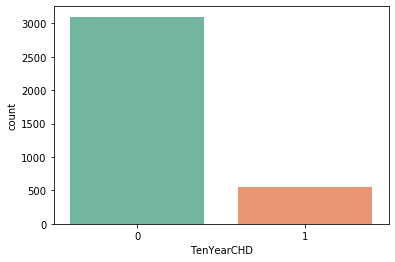

In [14]:
sns.countplot(x='TenYearCHD', data=heart, palette='Set2')
plt.show()

In [15]:
count_no_dis = len(heart[heart['TenYearCHD']==0])
count_dis = len(heart[heart['TenYearCHD']==1])
pct_of_no_dis = count_no_dis/(count_no_dis+count_dis)
print("Percentage of people with no heart disease is", pct_of_no_dis*100)
pct_of_dis = count_dis/(count_no_dis+count_dis)
print("Percentage of people with heart disease is", pct_of_dis*100)

Percentage of people with no heart disease is 84.77310005467469
Percentage of people with heart disease is 15.226899945325314


Data is imbalanced. The proportion of people with heart diseases is smaller than people with no problems. The ratio is 85:15

C:\Users\polin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


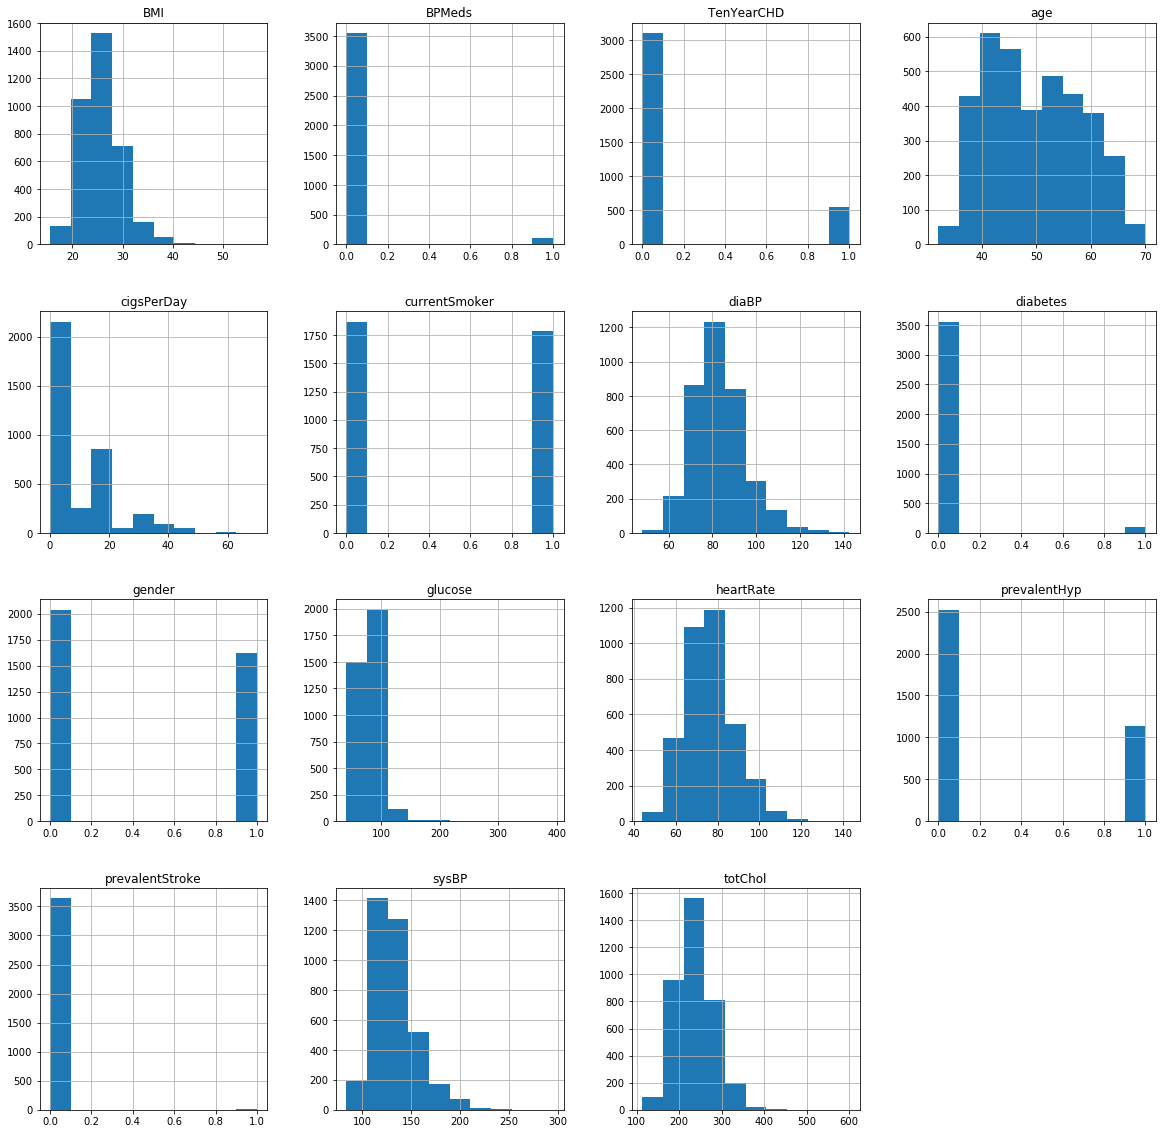

In [16]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
heart.hist(ax = ax);
plt.show()

### Modeling

In [17]:
# Select variavles
x = heart.iloc[:, :-1].values
y = heart['TenYearCHD'].values

In [18]:
# Feature Scaling
sc = StandardScaler()
x = sc.fit_transform(x)

In [19]:
# Splitting the Data into Train and Test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [20]:
# Create a model
logistic_model = LogisticRegression(solver='liblinear', random_state=0)

In [21]:
logistic_model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

### Evaluate model

In [22]:
# Check model probability matrix
p_predict = logistic_model.predict_proba(x_test)
p_predict

array([[0.84206281, 0.15793719],
       [0.60569375, 0.39430625],
       [0.93214126, 0.06785874],
       ...,
       [0.74798783, 0.25201217],
       [0.91765412, 0.08234588],
       [0.92568859, 0.07431141]])

In [23]:
# Test model predicton
y_predict = logistic_model.predict(x_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

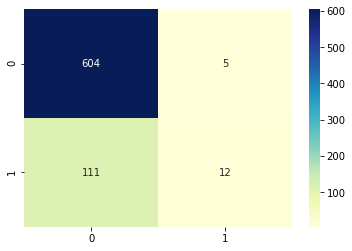

In [24]:
# Build confusion matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
plt.show()

In [25]:
# Check accuracy of the model
logic_score = logistic_model.score(x_test, y_test)
logic_score

0.8415300546448088

In [26]:
logistic_model.intercept_

array([-1.97253228])

In [27]:
logistic_model.coef_

array([[ 0.24275739,  0.48909334,  0.02626487,  0.20469003,  0.02166699,
         0.05903733,  0.09547116,  0.00686685,  0.10328515,  0.30070754,
        -0.00321782,  0.06079354, -0.06216734,  0.21310271]])

In [28]:
# Check for model overfiting
logic_score2 = logistic_model.score(x_train, y_train)
logic_score2

0.8585099111414901

In [29]:
# Report of results
report = classification_report(y_test, y_predict)
print('REPORT:', report, sep='\n')

REPORT:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       609
           1       0.71      0.10      0.17       123

   micro avg       0.84      0.84      0.84       732
   macro avg       0.78      0.54      0.54       732
weighted avg       0.82      0.84      0.79       732



### Analysis of Results

Logistic model was build for predicting heart diseases based on personal health indicators. It was trained and tested, and here is an analysis of the results. A probability matrix was constructed which returns each single observation prediction output. A confusion matrix was constructed to provide more detailed information on the accuracy of the model and the obtained results are as follows:
* 604 true negative predictions: 604 observations are zeros predicted correctly.
* 111 false negative predictions: 111 observations are ones wrongly predicted as zeros.
* 5 false positive prediction: 5 observations are a zero that were wrongly predicted as one.
* 12 true positive predictions: 12 observations are ones predicted correctly.

Consequently 116 out of 732 observations are wrongly predicted. This constitutes 16% of all sample or 84% correctness as the score of the model states. Since the accuracy of the model on the training data is 86% and there is no significant difference between testing and taining prediction accuracy of the model it can be concluded that the model is not overfitting. But since 16% incorrect predictions is not so small percent and taking into account that heart diseases are one of the main factors that cause deaths through population it is advisable to investigate the data deeper, try to improve the current model or create other models over data aiming to minimize the error percent and check if better model exist.